In [127]:
import os,os.path
for dirname, _, filenames in os.walk('C:\\Users\\Mazen Ali\\Documents\\Fashion MNIST Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\fashion-mnist_test.csv
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\fashion-mnist_train.csv
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\t10k-images-idx3-ubyte
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\t10k-labels-idx1-ubyte
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\train-images-idx3-ubyte
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\train-labels-idx1-ubyte
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\Untitled.ipynb
C:\Users\Mazen Ali\Documents\Fashion MNIST Dataset\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [128]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization,MaxPool2D
from tensorflow.keras.layers import Convolution2D
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [129]:
train_df = pd.read_csv('C:\\Users\\Mazen Ali\\Documents\\Fashion MNIST Dataset\\fashion-mnist_train.csv')
test_df= pd.read_csv('C:\\Users\\Mazen Ali\\Documents\\Fashion MNIST Dataset\\fashion-mnist_test.csv')


In [130]:
train_df.shape

(60000, 785)

In [131]:
test_df.shape

(10000, 785)

In [151]:
train_df.describe()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [152]:
y_train = train_df['label'].values
x_train = train_df.drop("label", axis=1)
x_train = x_train.values

y_test = test_df['label'].values
x_test = test_df.drop("label", axis=1)
x_test = x_test.values

In [153]:
#normalize
x_train = x_train/255.0
x_test  = x_test/255.0
#reshape images
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
#one-hot encoding
num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (54000, 28, 28, 1)
y_train shape:  (54000, 10)
x_test shape:  (10000, 28, 28, 1)
y_test shape:  (10000, 10)


In [155]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.25),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

cnn_model.compile(loss ='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [156]:
cnn_model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 flatten_25 (Flatten)        (None, 5408)              0         
                                                                 
 dense_50 (Dense)            (None, 32)                173088    
                                                                 
 dense_51 (Dense)            (None, 10)                330       
                                                     

In [157]:
history=cnn_model.fit(x_train, y_train, batch_size=256, epochs=25, verbose=1, \
validation_data=(x_test, y_test), shuffle=True)
val_loss, val_acc=cnn_model.evaluate(x_val, y_val)

Epoch 1/25
211/211 [==============================] - 1s 6ms/step - loss: 0.6289 - accuracy: 0.7812 - val_loss: 0.4232 - val_accuracy: 0.8524
Epoch 2/25
211/211 [==============================] - 1s 4ms/step - loss: 0.4011 - accuracy: 0.8601 - val_loss: 0.3604 - val_accuracy: 0.8782
Epoch 3/25
211/211 [==============================] - 1s 4ms/step - loss: 0.3613 - accuracy: 0.8731 - val_loss: 0.3303 - val_accuracy: 0.8894
Epoch 4/25
211/211 [==============================] - 1s 4ms/step - loss: 0.3372 - accuracy: 0.8793 - val_loss: 0.3159 - val_accuracy: 0.8914
Epoch 5/25
211/211 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.8889 - val_loss: 0.3023 - val_accuracy: 0.8973
Epoch 6/25
211/211 [==============================] - 1s 4ms/step - loss: 0.3012 - accuracy: 0.8923 - val_loss: 0.2885 - val_accuracy: 0.9020
Epoch 7/25
211/211 [==============================] - 1s 4ms/step - loss: 0.2877 - accuracy: 0.8974 - val_loss: 0.2843 - val_accuracy: 0.9014
Epoch 

In [158]:
print("validation loss: ", val_loss)
print("validation accuracy: ", val_acc)

validation loss:  0.2567991614341736
validation accuracy:  0.9088333249092102


Text(0.5, 1.0, 'Train - Accuracy')

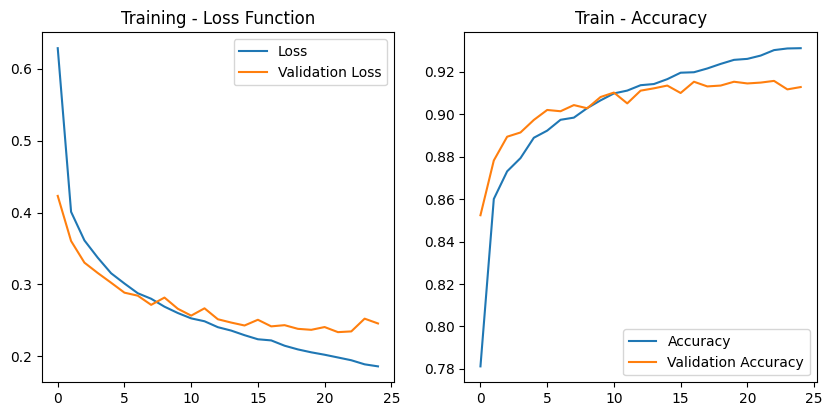

In [161]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

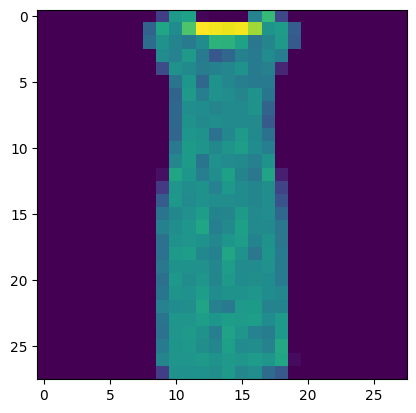

In [216]:
plt.imshow(x_val[40][:,:,0])
plt.show()

313/313 [==============================] - 1s 2ms/step


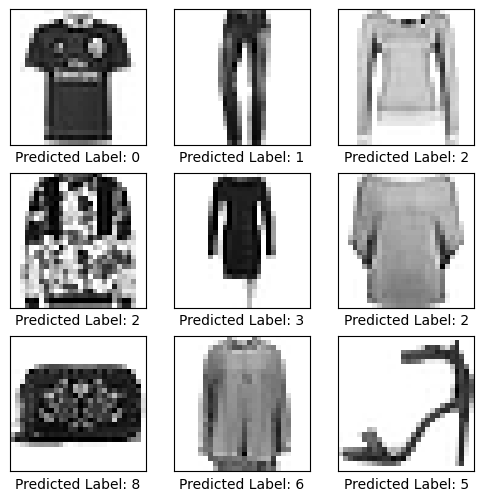

In [214]:
# Get the predictions on the test set
y_pred = cnn_model.predict(x_test)

# Convert the predictions to integer labels
y_pred = np.argmax(y_test, axis=1)

# Plot some examples of the test set with their predicted labels
num_examples =9
plt.figure(figsize=(6,6))
for i in range(num_examples):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel('Predicted Label: {}'.format(y_pred[i]))
plt.show()